In [36]:
import numpy as np
import matplotlib.pyplot as plt
from src.L_functions import rast
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

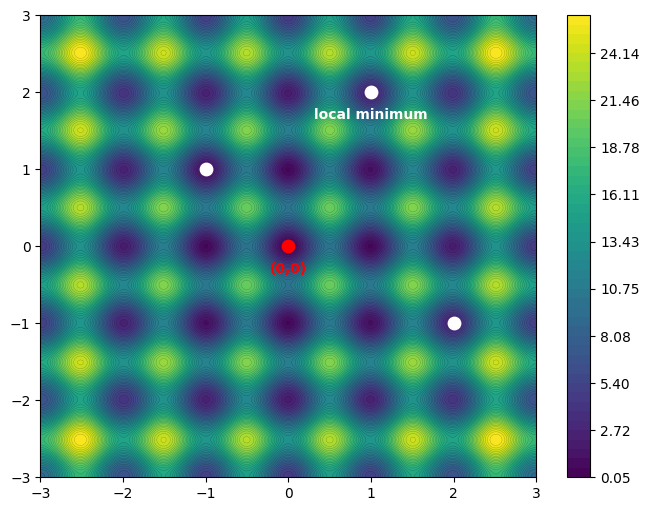

In [47]:
# 2차원 그리드 생성
a = 3
x = np.linspace(-a, a, 200)
y = np.linspace(-a, a, 200)
X, Y = np.meshgrid(x, y)

# 함수 값 계산
Z = np.array([[rast(np.array([xi, yi])) for xi, yi in zip(rowX, rowY)] 
              for rowX, rowY in zip(X, Y)])

# 등고선 그래프
plt.figure(figsize=(8,6))

# 등고선 레벨 정의: min-max 범위에 따라 균등하게 50레벨
levels = np.linspace(Z.min(), Z.max(), 50)

# 색상 강조
contour = plt.contourf(X, Y, Z, levels=levels, cmap='viridis')  # viridis: 색상 대비 좋음
plt.colorbar(contour)#, label='Rastrigin value')

# 등고선 테두리 추가 (선명도 향상)
cs = plt.contour(X, Y, Z, levels=levels, colors='k', linewidths=0.3, alpha=0.3)

# Global Minimum (0,0) 빨간 점 표시
plt.scatter(0, 0, color='red', s=80, label='Global Minimum', zorder=5)
plt.text(0, -0.2, '(0,0)', color='red', fontsize=10, fontweight='bold', ha='center', va='top', zorder=6)

# local minimum 하얀 점 표시
plt.scatter(-1, 1, color='white', s=80, label='Global Minimum', zorder=5)
plt.scatter(2, -1, color='white', s=80, label='Global Minimum', zorder=5)
plt.scatter(1, 2, color='white', s=80, label='Global Minimum', zorder=5)
plt.text(1, 1.8, 'local minimum', color='white', fontsize=10, fontweight='bold', ha='center', va='top', zorder=6)

# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('2D Rastrigin Function Contour Plot')
# plt.show()
plt.savefig("2d_rast.pdf", format='pdf', bbox_inches='tight')

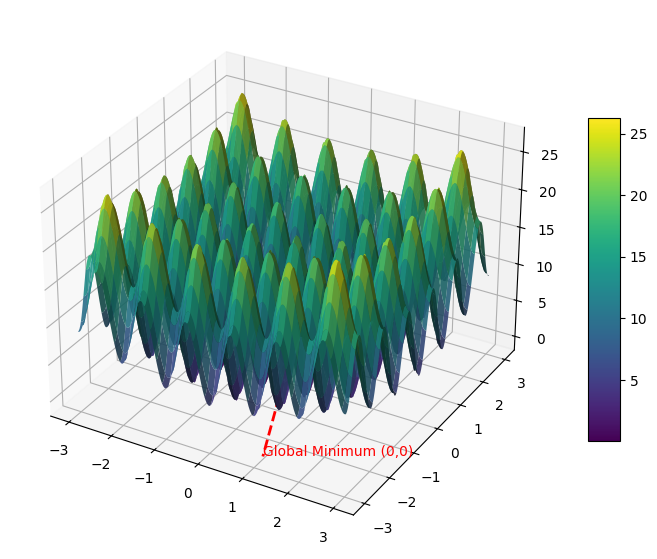

In [48]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# 색상과 높낮이 정규화
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.viridis(norm(Z))

# 3D surface
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0, antialiased=True, alpha=0.9)

# 컬러바
mappable = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
mappable.set_array(Z)
fig.colorbar(mappable, ax=ax, shrink=0.6, aspect=10)#, label='Rastrigin value')

# Global minimum 위치
x_min, y_min = 0, 0
z_min = rast(np.array([x_min, y_min]))

# 빨간 점 표시
ax.scatter(x_min, y_min, z_min, color='red', s=50)

# 화살표 밖으로 빼서 표시
text_x, text_y, text_z = 1.2, -3, -0  # 그래프 외부 좌표
ax.text(text_x, text_y, text_z, "Global Minimum (0,0)", color='red', fontsize=10)

# 빨간 점에서 텍스트까지 선 연결
ax.plot([x_min, text_x], [y_min, text_y], [z_min, text_z], color='red', linewidth=2, linestyle='--')

# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('Rastrigin value')
# ax.set_title('2D Rastrigin Function with Global Minimum Highlighted')
# ax.legend()

# plt.show()
plt.savefig("3d_rast.pdf", format='pdf', bbox_inches='tight')